# Carregando os conjuntos de dados

In [1]:
import pandas as pd

In [2]:
local_0 = pd.read_csv('/datasets/geo_data_0.csv')
local_1 = pd.read_csv('/datasets/geo_data_1.csv')
local_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
print(local_0.info())
print(local_0)
print(local_0.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
          id        f0        f1        f2     product
0      txEyH  0.705745 -0.497823  1.221170  105.280062
1      2acmU  1.334711 -0.340164  4.365080   73.037750
2      409Wp  1.022732  0.151990  1.419926   85.265647
3      iJLyR -0.032172  0.139033  2.978566  168.620776
4      Xdl7t  1.988431  0.155413  4.751769  154.036647
...      ...       ...       ...       ...         ...
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl5

Tudo Ok com o conjunto de dados do local_0

In [5]:
print(local_1.info())
print(local_1)
print(local_1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
          id         f0         f1        f2     product
0      kBEdx -15.001348  -8.276000 -0.005876    3.179103
1      62mP7  14.272088  -3.475083  0.999183   26.953261
2      vyE1P   6.263187  -5.948386  5.001160  134.766305
3      KcrkZ -13.081196 -11.506057  4.999415  137.945408
4      AHL4O  12.702195  -8.147433  5.004363  134.766305
...      ...        ...        ...       ...         ...
99995  QywKC   9.535637  -6.878139  1.998296   53.906522
99996  ptvty -10.160631 -12.558096  5.005581  137.945408
99997  09gWa  -7.378891  -3.084104  4.998651  13

Tudo ok com o conjunto de dados do local_1

In [7]:
print(local_2.info())
print(local_2)
print(local_2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
          id        f0        f1        f2     product
0      fwXo0 -1.146987  0.963328 -0.828965   27.758673
1      WJtFt  0.262778  0.269839 -2.530187   56.069697
2      ovLUW  0.194587  0.289035 -5.586433   62.871910
3      q6cA6  2.236060 -0.553760  0.930038  114.572842
4      WPMUX -0.515993  1.716266  5.899011  149.600746
...      ...       ...       ...       ...         ...
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp

Tudo ok com o conjunto de dados local_2

# Treinando o Modelo para cada local

In [9]:
# Importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [10]:
# Definindo as características do modelo, todas exceto "Product" e "id"
features_0 = local_0.drop(['product', 'id'], axis=1)
features_1 = local_1.drop(['product', 'id'], axis=1)
features_2 = local_2.drop(['product', 'id'], axis=1)

# Defininindo os objetivos
target_0 = local_0['product']
target_1 = local_1['product']
target_2 = local_2['product']

## Local_0

In [42]:
# Separando os dados para treino e teste, colocando 75% em terinamento e o resto em validdação
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0,target_0 , test_size=0.25, random_state=12345)

In [45]:
# Conferindo se os dados foram separados corretamente
print('Tamanho do conjunto features_train_0:',len(features_train_0)/len(features_0))
print('Tamanho do conjunto target_train_0:', len(target_train_0)/len(target_0))

Tamanho do conjunto features_train_0: 0.75
Tamanho do conjunto target_train_0: 0.75


In [12]:
# Treinando o modelo de Regressão Linear
model = LinearRegression()
model.fit(features_train_0,target_train_0) 
predictions_valid_0 = model.predict(features_valid_0)

# Calculando o REQM do conjunto de validação
result = mean_squared_error(target_valid_0, predictions_valid_0) ** 0.5
print("O REQM do modelo de regressão linear no conjunto de validação:", result)

# Calculando o valor médio de reservas da predição
med_0 = predictions_valid_0.mean()
print("O valor médio no conjunto de validação do local_0:", med_0)

O REQM do modelo de regressão linear no conjunto de validação: 37.5794217150813
O valor médio no conjunto de validação do local_0: 92.59256778438035


In [13]:
# Salvando as predições e respostas corretas para o conjunto de validação
valid_0 = pd.DataFrame({'target_valid': target_valid_0, 'predictions_valid': predictions_valid_0})
valid_0.head(10)

,target_valid,predictions_valid
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088
9539,37.735331,69.127076
8482,139.227191,125.106759
30284,72.491987,87.643849
66393,11.465993,86.035871
99584,110.562031,98.655311


É possível perceber que o REQM do modelo de regressão linear do conjunto de validação está acima de 0, mas ao comparar com o valor médio do nosso conjunto de validação, podemos considerar aceitável o valor do REQM pois os valores da média é quase 3x maior que a diferença do REQM.

## Local_1

In [14]:
# Separando os dados para treino e teste, colocando 75% em terinamento e o resto em validdação
features_train_1, features_valid_1, target_train_1, target_valid_1= train_test_split(
    features_1,target_1 , test_size=0.25, random_state=12345)

In [46]:
# Conferindo se os dados foram separados corretamente
print('Tamanho do conjunto features_train_1:',len(features_train_1)/len(features_1))
print('Tamanho do conjunto target_train_1:', len(target_train_1)/len(target_1))

Tamanho do conjunto features_train_1: 0.75
Tamanho do conjunto target_train_1: 0.75


In [15]:
# Treinando o modelo de Regressão Linear
model = LinearRegression()
model.fit(features_train_1,target_train_1) 
predictions_valid_1 = model.predict(features_valid_1)

# Calculando o REQM do conjunto de validação
result = mean_squared_error(target_valid_1, predictions_valid_1) ** 0.5
print("O REQM do modelo de regressão linear no conjunto de validação:", result)

# Calculando o valor médio de reservas da predição
med_1 = predictions_valid_1.mean()
print("O valor médio no conjunto de validação do local_1:", med_1)

O REQM do modelo de regressão linear no conjunto de validação: 0.893099286775617
O valor médio no conjunto de validação do local_1: 68.728546895446


In [16]:
# Salvando as predições e respostas corretas para o conjunto de validação
valid_1 = pd.DataFrame({'target_valid': target_valid_1, 'predictions_valid': predictions_valid_1})
valid_1.head(10)

,target_valid,predictions_valid
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856
9539,110.992147,111.438490
8482,137.945408,137.134374
30284,84.038886,82.888902
66393,110.992147,110.897311
99584,26.953261,29.219306


É possível perceber que o REQM do modelo de regressão linear do conjunto de validação está bem próximo de 0, ou seja, quase não existe variação entre o conjunto de validação e o de teste. Podemos dizer que os valores são mais confiáveis que as demais regiões.

## Local_2

In [17]:
# Separando os dados para treino e teste, colocando 75% em terinamento e o resto em validdação
features_train_2, features_valid_2, target_train_2, target_valid_2= train_test_split(
    features_2,target_2 , test_size=0.25, random_state=12345)

In [47]:
# Conferindo se os dados foram separados corretamente
print('Tamanho do conjunto features_train_2:',len(features_train_2)/len(features_2))
print('Tamanho do conjunto target_train_2:', len(target_train_2)/len(target_2))

Tamanho do conjunto features_train_2: 0.75
Tamanho do conjunto target_train_2: 0.75


In [18]:
# Treinando o modelo de Regressão Linear
model = LinearRegression()
model.fit(features_train_2,target_train_2) 
predictions_valid_2 = model.predict(features_valid_2)

# Calculando o REQM do conjunto de validação
result = mean_squared_error(target_valid_2, predictions_valid_2) ** 0.5
print("O REQM do modelo de regressão linear no conjunto de validação:", result)

# Calculando o valor médio de reservas da predição
med_2 = predictions_valid_2.mean()
print("O valor médio no conjunto de validação do local_2:", med_2)

O REQM do modelo de regressão linear no conjunto de validação: 40.02970873393434
O valor médio no conjunto de validação do local_2: 94.96504596800489


In [19]:
# Salvando as predições e respostas corretas para o conjunto de validação
valid_2 = pd.DataFrame({'target_valid': target_valid_2, 'predictions_valid': predictions_valid_2})
valid_2.head(10)

,target_valid,predictions_valid
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310
9539,105.904629,121.939197
8482,51.646180,119.053040
30284,173.162121,75.396575
66393,113.143072,111.400543
99584,56.803215,84.029320


É possível perceber que o REQM do modelo de regressão linear do conjunto de validação está bem acima de 0, mas ao comparar com o valor médio do nosso conjunto de validação, percebemos que o valor médio está mais que o dobro de diferença do REQM, não considero essa diferença média entre o modelo e o teste aceitável pois pode interfeir na previsão de forma mais acentuada.

# Cálculo do Lucro

In [20]:
# Custo para desenvolvimento de 200 poços 
custo_200 = 100000000
custo_1 = custo_200/200

# Receita por unidade de produto (sendo que cada unidade de produto = 1.000 barris com lucro de 4,5 dólares por barril)
receita = 4500

In [21]:
# cálculo para desenvolver um novo poço com lucro, QUAL VALOR DE PRODUTO QUE A RESERVA DEVE APRESENTAR?

reserva = custo_1/receita
reserva

111.11111111111111

In [22]:
# O poço precisa ter mais de 112 unidades de produto em reserva para possuir lucro.
print('O valor médio das reservas de petróleo do local_0:', local_0['product'].mean())
print('O valor médio das reservas de petróleo do local_1:', local_1['product'].mean())
print('O valor médio das reservas de petróleo do local_2:', local_2['product'].mean())

O valor médio das reservas de petróleo do local_0: 92.50000000000001
O valor médio das reservas de petróleo do local_1: 68.82500000000002
O valor médio das reservas de petróleo do local_2: 95.00000000000004


# Cálculo do lucro

In [29]:
# Função para o cálculo do lucro
def lucro_poco(valid, reserva, receita, custo_1):
    
    local_200 = valid.sort_values(by='predictions_valid', ascending=False).iloc[:200]
    
    valid['lucro_predictions'] = valid['predictions_valid'].apply(lambda x: (x*receita)-custo_1 if x>=reserva else 0)
        
    return local_200 

Para o cálculo do lucro de cada região, peguei os 200 maiores valores da reserva que foi predito pelo modelo e apliquei a fórmula do lucro, onde é o quantidade de reserva multiplicada pela receita (4500) menos o custo de apenas 1 posto de petróleo (se para 200 postos o custo é de 100 milhões, o custo para apenas 1 é de 500 mil) e o resultado é um DF com o valor do lucro de cada posto.

In [33]:
# Lucro da região 0
lucro_0 = lucro_poco(valid_0,reserva, receita, custo_1 )
print(lucro_0)
print(lucro_0['lucro_predictions'].sum())

       target_valid  predictions_valid  lucro_predictions
93073    162.810993         180.180713      310813.208776
46784    153.639837         176.252213      293134.959252
78948    162.153488         175.850623      291327.804775
43388     96.893581         175.658429      290462.930300
6496     178.879516         173.299686      279848.587829
...             ...                ...                ...
30488    179.683422         148.507064      168281.787372
98799     95.396917         148.481767      168167.950072
53840    160.361464         148.476498      168144.241721
4638     102.186603         148.436761      167965.426709
75908    119.890261         148.365941      167646.734499

[200 rows x 3 columns]
39960488.774651304


In [34]:
# Lucro da região 1
lucro_1 = lucro_poco(valid_1,reserva, receita, custo_1 )
print(lucro_1)
print(lucro_1['lucro_predictions'].sum())

       target_valid  predictions_valid  lucro_predictions
38665    137.945408         139.818970      129185.364156
20191    137.945408         139.773423      128980.403308
14041    137.945408         139.703330      128664.986409
24274    137.945408         139.560938      128024.219177
92782    137.945408         139.516754      127825.394320
...             ...                ...                ...
13370    137.945408         138.421423      122896.404035
45823    137.945408         138.416960      122876.320892
86987    137.945408         138.413881      122862.463171
72313    137.945408         138.412834      122857.752128
59892    137.945408         138.410697      122848.135315

[200 rows x 3 columns]
24857120.519735426


In [35]:
# Lucro da região 2
lucro_2 = lucro_poco(valid_2,reserva, receita, custo_1 )
print(lucro_2)
print(lucro_2['lucro_predictions'].sum())

       target_valid  predictions_valid  lucro_predictions
98619    175.103291         165.856833      246355.749285
46649    131.627481         165.679685      245558.583697
82661    141.160070         163.439962      235479.830494
53151    159.676082         162.062589      229281.652747
18747    142.135203         161.797476      228088.643267
...             ...                ...                ...
66244    104.949568         142.490763      141208.432752
34285     89.492500         142.485922      141186.650401
36778    184.895101         142.465777      141095.997523
7806     137.480469         142.454763      141046.434686
62558    134.507140         142.408851      140839.831073

[200 rows x 3 columns]
33217543.962432563


# Bootstrapping 

In [38]:
import numpy as np
import matplotlib.pyplot as plt

## local_0

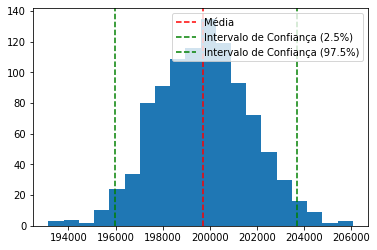

In [39]:
# Tamanho da amostra original
n = len(lucro_0)

# Número de amostras de bootstrap
n_bootstrap = 1000

# Criar 1000 amostras de bootstrap
bootstrap_samples = np.random.choice(lucro_0['lucro_predictions'], size=(n_bootstrap, n), replace=True)

# Calcular o lucro para cada amostra de bootstrap
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Calcular a média, desvio padrão e intervalo de confiança da distribuição de lucro
mean = np.mean(bootstrap_means)
std = np.std(bootstrap_means)
ci_95 = np.percentile(bootstrap_means, [2.5, 97.5])

# Plotar o histograma da distribuição de lucro
import matplotlib.pyplot as plt
plt.hist(bootstrap_means, bins=20)
plt.axvline(mean, color='r', linestyle='--', label='Média')
plt.axvline(ci_95[0], color='g', linestyle='--', label='Intervalo de Confiança (2.5%)')
plt.axvline(ci_95[1], color='g', linestyle='--', label='Intervalo de Confiança (97.5%)')
plt.legend()
plt.show()

## local_1

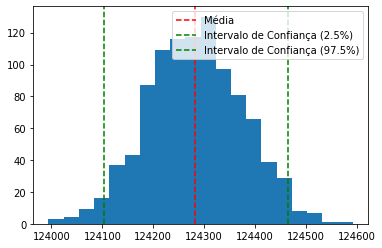

In [40]:
# Tamanho da amostra original
n = len(lucro_1)

# Número de amostras de bootstrap
n_bootstrap = 1000

# Criar 1000 amostras de bootstrap
bootstrap_samples = np.random.choice(lucro_1['lucro_predictions'], size=(n_bootstrap, n), replace=True)

# Calcular o lucro para cada amostra de bootstrap
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Calcular a média, desvio padrão e intervalo de confiança da distribuição de lucro
mean = np.mean(bootstrap_means)
std = np.std(bootstrap_means)
ci_95 = np.percentile(bootstrap_means, [2.5, 97.5])

# Plotar o histograma da distribuição de lucro
import matplotlib.pyplot as plt
plt.hist(bootstrap_means, bins=20)
plt.axvline(mean, color='r', linestyle='--', label='Média')
plt.axvline(ci_95[0], color='g', linestyle='--', label='Intervalo de Confiança (2.5%)')
plt.axvline(ci_95[1], color='g', linestyle='--', label='Intervalo de Confiança (97.5%)')
plt.legend()
plt.show()

## local_2

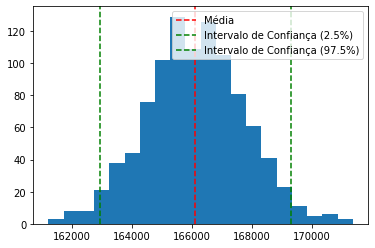

In [41]:
# Tamanho da amostra original
n = len(lucro_2)

# Número de amostras de bootstrap
n_bootstrap = 1000

# Criar 1000 amostras de bootstrap
bootstrap_samples = np.random.choice(lucro_2['lucro_predictions'], size=(n_bootstrap, n), replace=True)

# Calcular o lucro para cada amostra de bootstrap
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Calcular a média, desvio padrão e intervalo de confiança da distribuição de lucro
mean = np.mean(bootstrap_means)
std = np.std(bootstrap_means)
ci_95 = np.percentile(bootstrap_means, [2.5, 97.5])

# Plotar o histograma da distribuição de lucro
import matplotlib.pyplot as plt
plt.hist(bootstrap_means, bins=20)
plt.axvline(mean, color='r', linestyle='--', label='Média')
plt.axvline(ci_95[0], color='g', linestyle='--', label='Intervalo de Confiança (2.5%)')
plt.axvline(ci_95[1], color='g', linestyle='--', label='Intervalo de Confiança (97.5%)')
plt.legend()
plt.show()

# Conlusão

Após analisar todos os locais e postos selecionados, e levando em conta a qualidade do modelo de regressão que montamos, eu acrdito que a melhor região é a segunda. Pois o modelo é mais preciso que os demais e que por mais que apresente o menor lucro, é a que considero ter a menor chance de risco. 